https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor


### 1. Importa el csv "temps.csv"

In [2]:


df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [4]:
# Pasamos a dummies, pero se podria eliminar perfectamente esta columna
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [9]:
df = pd.get_dummies(df)

### 3. Divide en train y test

In [10]:
target = df['actual']
features = df.drop('actual', 1)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.25,
                                                    random_state = 42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [12]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [15]:
predictions_train = dtr.predict(X_train)

errores_train = abs(predictions_train - y_train)

np.mean(errores_train)

0.0

In [16]:
predictions_test = dtr.predict(X_test)

errores_test = abs(predictions_test - y_test)

np.mean(errores_test)

5.528735632183908

### 6. Calcula su MAPE
Sin usar sklearn

In [18]:
prop = 100 * (errores_train/y_train)

mape = np.mean(prop)
mape

0.0

In [19]:
prop = 100 * (errores_test/y_test)

mape = np.mean(prop)
mape

8.640779201586058

### 7. Representa el árbol de decision

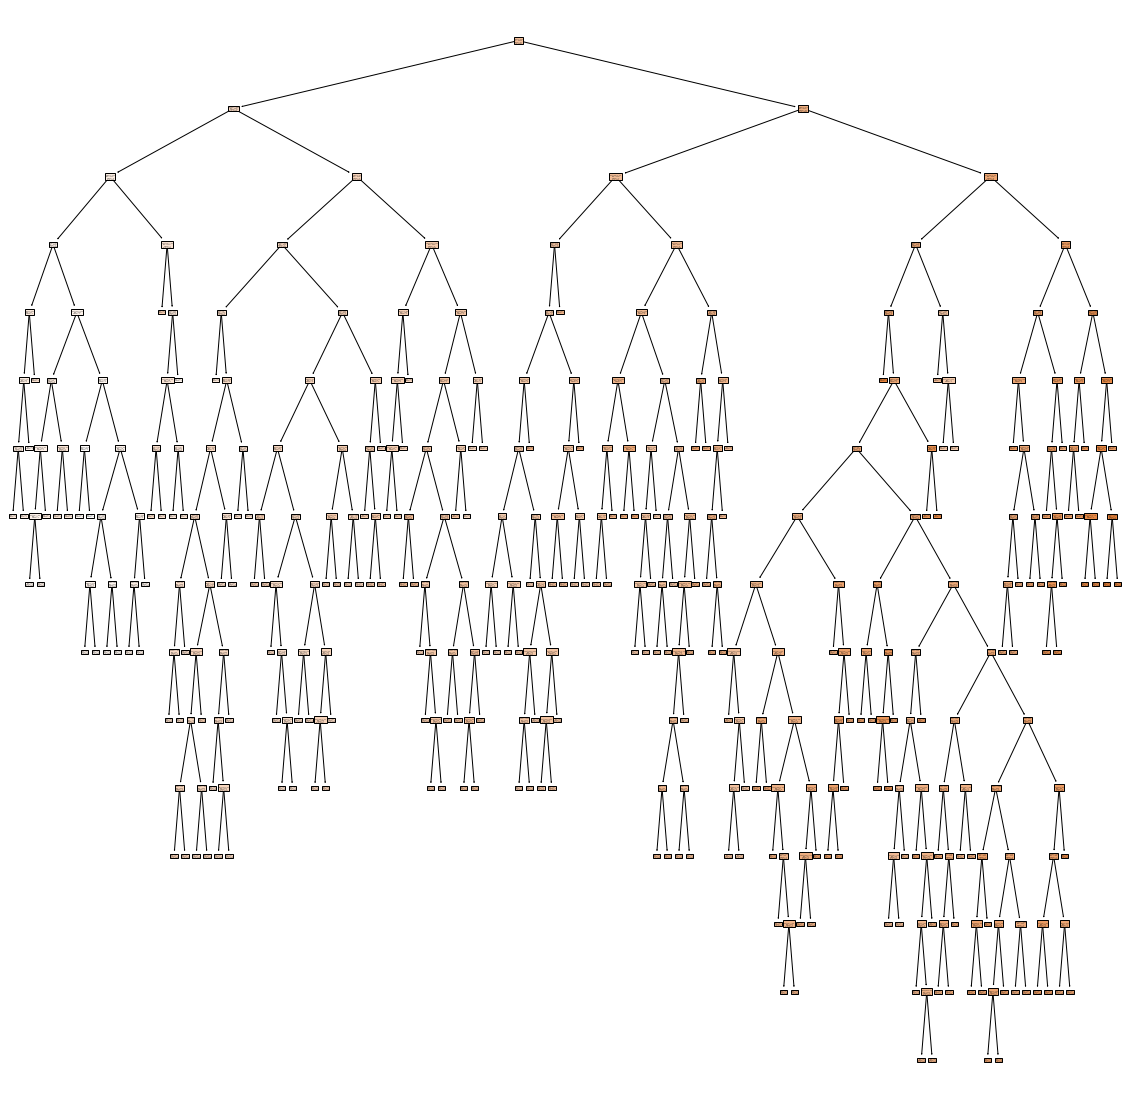

In [22]:

plt.figure(figsize=(20, 20))
sklearn.tree.plot_tree(dtr,
                      feature_names = list(features.columns),
                      class_names = 'actual',
                      filled=True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [23]:
dtr = DecisionTreeRegressor(max_depth=3)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [24]:
predictions_train = dtr.predict(X_train)

errores_train = abs(predictions_train - y_train)

np.mean(errores_train)

3.664084957174615

In [25]:
predictions_test = dtr.predict(X_test)

errores_test = abs(predictions_test - y_test)

np.mean(errores_test)

4.298171655733803

### 10. Vuelve a representar su árbol

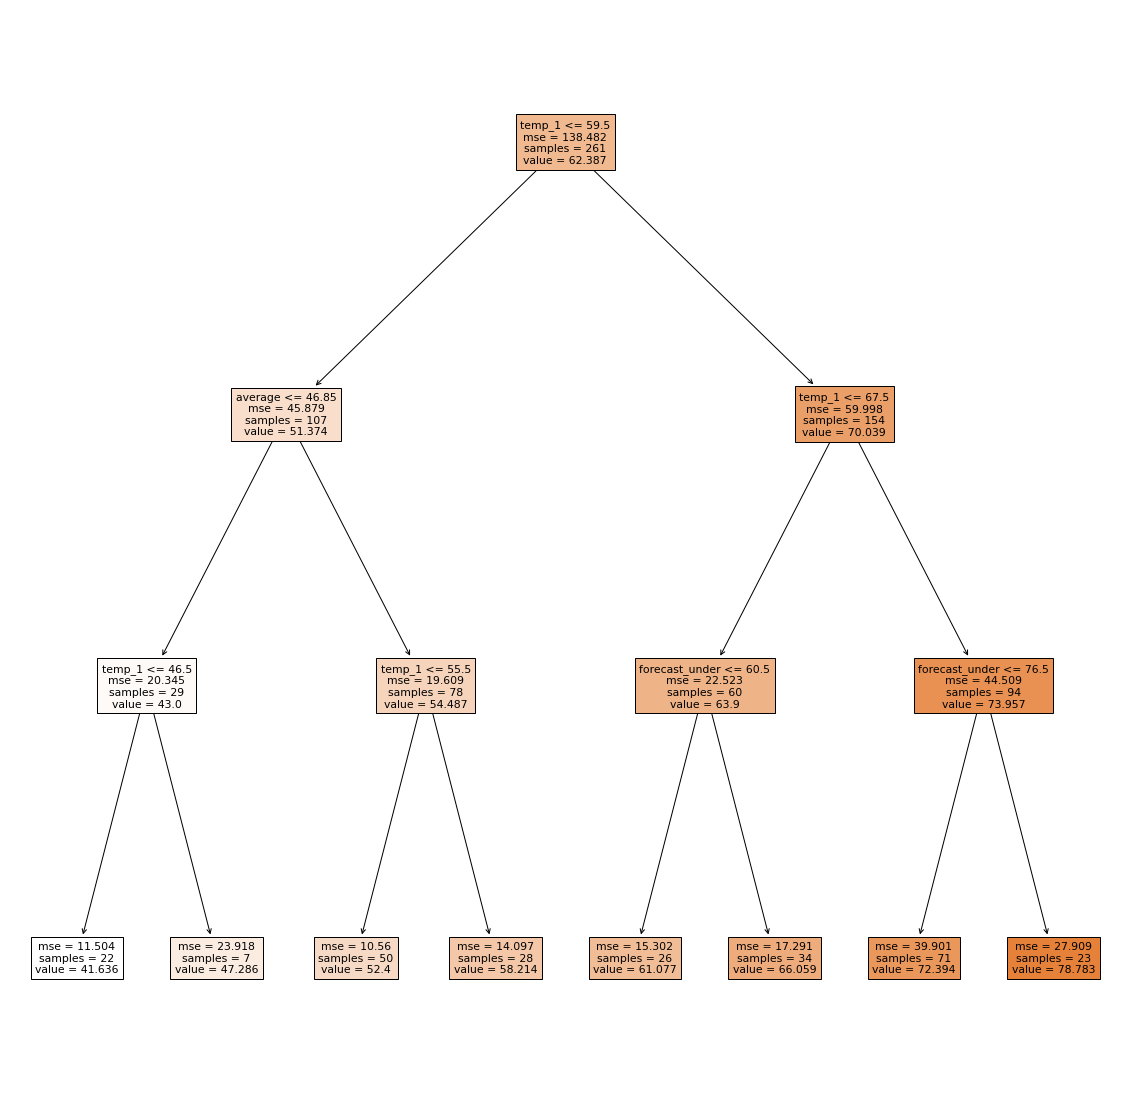

In [26]:
plt.figure(figsize=(20, 20))
sklearn.tree.plot_tree(dtr,
                      feature_names = list(features.columns),
                      class_names = 'actual',
                      filled=True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [28]:
import_dict = {
    'features': features.columns,
    'importance': dtr.feature_importances_
}

pd.DataFrame(import_dict).sort_values('importance', ascending=False)

,features,importance
4,temp_1,0.872637
5,average,0.091943
8,forecast_under,0.035419
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
0,year,0.000000
